<a href="https://colab.research.google.com/github/miggelucas/NLP-studies/blob/main/NLP_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook de treino de detecção de mensagens de SPAM a partir da leitura da mensagens de sms

# Part 1

In [26]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
%matplotlib inline

In [13]:
#nltk.download_shell() 
# Baixar o stopwords
# https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [1]:
url = 'https://raw.githubusercontent.com/miggelucas/NLP-studies/main/smsspamcollection/SMSSpamCollection'

In [9]:
messages = pd.read_csv(url, sep= '\t', names= ['label', 'body'])
messages

,label,body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
messages.describe()

,label,body
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
messages.groupby('label').describe()

body                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [19]:
messages["Length"] = [len(x) for x in messages['body']] # or messages['body'].apply(len)
messages

,label,body,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


# EDA

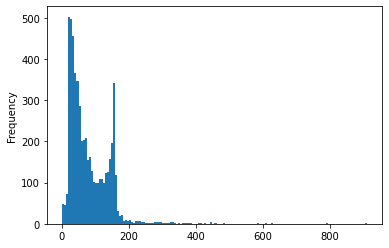

In [21]:
messages.Length.plot.hist(bins= 150)

In [22]:
messages.Length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [23]:
messages[messages['Length'] == 910]['body'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cf95e6f10>,
      dtype=object)

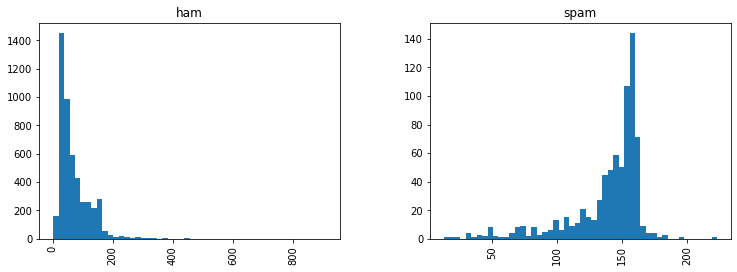

In [24]:
# O tamanho das mensgens parece ser relevante para determinar se é SPAM
messages.hist(column = 'Length', by = 'label', bins = 50, figsize = (12,4))

# Part 2

In [25]:
def text_process(mess):
  # 1. remove punctuation
  # 2. remove stop words
  # 3. return list of clean text words

  nopunc = [char for char in mess if char not in string.punctuation]
  
  nopunc = ''.join(nopunc)

  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [ ]:
messages['body'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: body, dtype: object

In [ ]:
# gera uma coluna com a frequência de cada palavara na mensagem
# vai gerar um acervo de todas as palavras encontradas
# para cada palavra haverá uma contagem
bow_transformer = CountVectorizer(analyzer= text_process).fit(messages['body'])

In [ ]:
print(len(bow_transformer.vocabulary_))

11425


In [ ]:
mess4 = messages['body'][3]
mess4

'U dun say so early hor... U c already then say...'

In [ ]:
bow4 = bow_transformer.transform([mess4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [ ]:
bow_transformer.get_feature_names()[9554]

'say'

# part 3

In [ ]:
messages_bow = bow_transformer.transform(messages["body"])

In [ ]:
# é esperado que hajam muitos zeros na nossa tabela
print("Shape of Sparse Matrix: ", messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [ ]:
# quantidade de zeros
messages_bow.nnz

50548

In [ ]:
# relação entre zeros o restante das contanges
sparsity = (100 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print(sparsity)

0.07940295412668218


In [ ]:
# uma espécie de standarscaler duplo
# verifica a normatização de cada palavra em relação ao restante da frase e a frequência de uso em outras mensagens
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [ ]:
tfidf4 = tfidf_transformer.transform(bow4)

In [ ]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [ ]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [ ]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
messages_tfidf

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

# Testing

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [ ]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [ ]:
messages['body'][4]

'U dun say so early hor... U c already then say...'

In [ ]:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
# testando o poder preditivo
from sklearn.model_selection import train_test_split

In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['body'], messages['label'], test_size= 0.3)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_naive = Pipeline([
                     ('bow', CountVectorizer(analyzer = text_process)),
                     ('tidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
])

In [ ]:
pipeline_naive.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f0307676d40>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
predictions_naive = pipeline.predict(msg_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_test, predictions_naive))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1456
        spam       1.00      0.67      0.80       216

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672

